# ch 16_9 Granger Causality Test

지금까지 하나의 시계열 변수를 예측하는 모델들에 대해서 알아보았습니다. 그런데 시계열 변수가 2개가 주어졌고, 이들간에 인과 관계가 있는지 여부를 알고 싶다면 어떻게 할 수 있을까요? 이 때 적용할 수 있는 기법이 Granger Causality Test입니다. 

In [1]:
import warnings

warnings.filterwarnings(action='ignore')

## 데이터 셋 준비

사용할 데이터 셋은 미국 휴스턴 가정집의 3년치 전력 소비량과 날씨 데이터 셋을 전처리한 것입니다. 결측치를 제거하고, 전력 소비량과 날씨 데이터를 조인하였습니다. 이 데이터 셋을 먼저 플랏을 그려보고, 시계열 데이터 간의 인과 관계를 검정해보겠습니다.

데이터 셋 링크: https://www.kaggle.com/datasets/srinuti/residential-power-usage-3years-data-timeseries

In [11]:
from utils import load_power

train_df, test_df = load_power()

In [21]:
train_df

,kWh,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Press_avg,Precipit
Date,,,,,,,
2017-01-01,0.508333,67.5,63.8,88.1,2.7,29.7,0.30
2017-01-02,0.361833,68.8,60.2,76.1,7.9,29.9,0.00
2017-01-03,0.658833,73.6,54.4,55.5,11.2,29.9,0.00
2017-01-04,0.474167,70.6,62.7,77.0,12.9,29.8,0.00
2017-01-05,0.693417,70.7,49.0,50.6,7.1,29.9,0.00
...,...,...,...,...,...,...,...
2019-06-27,0.968667,79.6,75.8,89.1,4.0,30.0,0.02
2019-06-28,1.145458,78.5,73.2,85.7,4.3,30.0,0.08
2019-06-29,1.155583,75.9,73.0,91.7,6.5,29.9,0.38


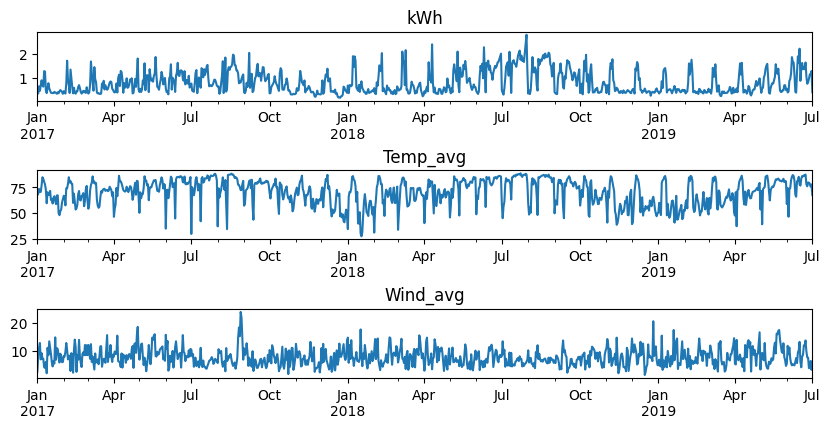

In [68]:
from utils import plot_multiple_timeseries

plot_multiple_timeseries(train_df, ["kWh", "Temp_avg", "Wind_avg"])

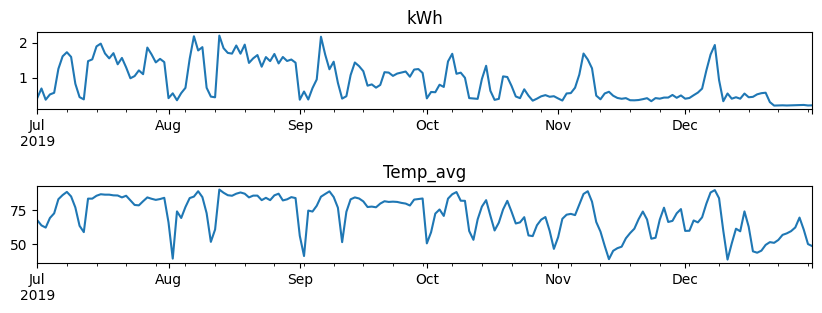

In [53]:
plot_multiple_timeseries(test_df, ["kWh", "Temp_avg"])

## Granger Causality

### 기본 개념

Granger Causality는 일반적으로 말하는 인과 관계는 아니지만, 유사한 방법으로 인과관계를 추측할 수 있게 해주는 방법 중 하나입니다. x와 y 두 시계열 데이터가 주어졌을 때, y를 예측하는데 x의 과거 데이터가 유용하게 사용된다면 둘 사이에 인과관계가 있다고 보는 방법입니다.

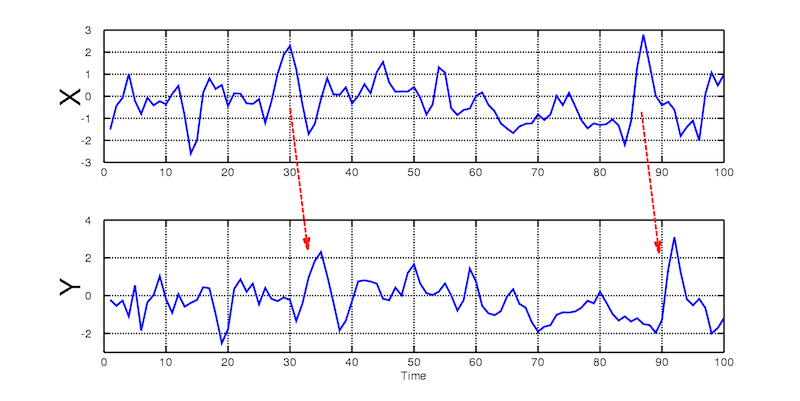

x와 y 두 시계열 데이터로 auto regressive 모델을 구성하면 아래와 같습니다. y의 현재 값을 예측할 때 x의 과거 값을 피쳐로 사용하고, x의 현재 값을 예측할 때 y의 과거 값을 피쳐로 사용하는 모델입니다.

$$y_{t}=\alpha+\sum_{j=1}^{p}\beta_{j}y_{t-j}+\sum_{j=1}^{r}\gamma_{j}x_{t-j}+\epsilon_{t}$$

$$x_{t}=\alpha^{*}+\sum_{j=1}^{p}\beta_{j}^{*}x_{t-j}+\sum_{j=1}^{r}\gamma_{j}^{*}y_{t-j}+\epsilon_{t}^{*}$$

만약 x의 과거 값이 y를 예측하는데 도움이 된다면 어느 j에 대해서 γj는 0이 아닐 것입니다. 마찬가지로 y의 과거 값이 x의 현재 값을 예측하는데 도움이 된다면 어떤 γ*j는 0이 아닐 것입니다. 이를 통계 기법을 활용하여 검정하는 것이 Granger Causality Test입니다.

$$x_{t}\;\text{helps to predict}\;y_{t}\;\text{if}\;\gamma_{j}\neq0\;\text{for some j}$$

$$y_{t}\;\text{helps to predict}\;x_{t}\;\text{if}\;\gamma_{j}^{*}\neq0\;\text{for some j}$$

### 가설 설정

이제 Granger Test의 귀무 가설과 대립가설을 살펴보겠습니다. 

- 귀무가설: x는 y를 Granger-cause 하지 않는다.
- 대립가설: x는 y를 Granger-cause 한다.


$$H_{0}:\gamma_{j}^{*}=0\;\text{for all j=1,2,...,r*}$$

$$H_{1}:\gamma_{j}^{*}\neq0\;\text{for some j}$$

### 정상성 확보

Granger Causality는 두 시계열 데이터가 stationary 해야한다는 전제 조건이 있습니다. kWh, Temp_avg 두 컬럼에 대해서 정상성 테스트를 진행해보겠습니다.

In [54]:
from utils import stationary_test

stationary_test(train_df, "kWh")
stationary_test(train_df, "Temp_avg")
stationary_test(train_df, "Temp_avg")

kWh ADF p-value: 0.0 stationary: True
kWh KPSS p-value: 0.1 stationary: True
Temp_avg ADF p-value: 0.0036 stationary: True
Temp_avg KPSS p-value: 0.1 stationary: True


두 데이터 모두 정상성이 확보되어 있음을 확인했습니다.

### 통계적 가설 검정 진행

statsmodels에 내장된 함수를 사용해 Granger Causality Test를 진행해보겠습니다. 두번째에 위치한 데이터가 첫번째에 위치한 데이터를 유발하는지를 검정합니다. 이 때, 몇번째 지연까지 포함할 지를 결정하는 maxlag라는 파라미터를 설정해주어야 합니다. 이는 여러가지 기준에 의해서 정할 수 있지만, 넉넉하게 12로 설정한 뒤에 테스트를 진행해보겠습니다.

In [67]:
from statsmodels.tsa.stattools import grangercausalitytests

result = grangercausalitytests(train_df[["kWh", "Temp_avg"]], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=39.1827 , p=0.0000  , df_denom=908, df_num=1
ssr based chi2 test:   chi2=39.3122 , p=0.0000  , df=1
likelihood ratio test: chi2=38.4876 , p=0.0000  , df=1
parameter F test:         F=39.1827 , p=0.0000  , df_denom=908, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=17.1794 , p=0.0000  , df_denom=905, df_num=2
ssr based chi2 test:   chi2=34.5486 , p=0.0000  , df=2
likelihood ratio test: chi2=33.9089 , p=0.0000  , df=2
parameter F test:         F=17.1794 , p=0.0000  , df_denom=905, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=12.7034 , p=0.0000  , df_denom=902, df_num=3
ssr based chi2 test:   chi2=38.4061 , p=0.0000  , df=3
likelihood ratio test: chi2=37.6169 , p=0.0000  , df=3
parameter F test:         F=12.7034 , p=0.0000  , df_denom=902, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=12.3928 , p=0.0000  

검정 결과 모든 lag에서 평균 기온의 변화는 전력 소요량의 변화를 유의하게 유발한다고 해석할 수 있습니다. 그렇다면 평균 풍속의 변화는 전력 소요량에 유의미한 변화를 미치는지 검정해보겠습니다.

In [70]:
result = grangercausalitytests(train_df[["kWh", "Wind_avg"]], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3235  , p=0.5697  , df_denom=908, df_num=1
ssr based chi2 test:   chi2=0.3246  , p=0.5689  , df=1
likelihood ratio test: chi2=0.3245  , p=0.5689  , df=1
parameter F test:         F=0.3235  , p=0.5697  , df_denom=908, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6115  , p=0.5428  , df_denom=905, df_num=2
ssr based chi2 test:   chi2=1.2297  , p=0.5407  , df=2
likelihood ratio test: chi2=1.2288  , p=0.5410  , df=2
parameter F test:         F=0.6115  , p=0.5428  , df_denom=905, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8506  , p=0.4664  , df_denom=902, df_num=3
ssr based chi2 test:   chi2=2.5716  , p=0.4625  , df=3
likelihood ratio test: chi2=2.5680  , p=0.4631  , df=3
parameter F test:         F=0.8506  , p=0.4664  , df_denom=902, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6444  , p=0.6309  

평균 풍속의 경우에는 모든 lag에서 전력 소요량의 변화를 유발하지 못한다고 검정되었습니다. 마지막으로 그렇다면 처음에 진행했던 테스트를 뒤집어서 전력 소요량의 변화가 평균 기온의 변화를 유발하는지 검정해보겠습니다.

In [71]:
result = grangercausalitytests(train_df[["Temp_avg", "kWh"]], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=25.6097 , p=0.0000  , df_denom=908, df_num=1
ssr based chi2 test:   chi2=25.6943 , p=0.0000  , df=1
likelihood ratio test: chi2=25.3386 , p=0.0000  , df=1
parameter F test:         F=25.6097 , p=0.0000  , df_denom=908, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.8125 , p=0.0000  , df_denom=905, df_num=2
ssr based chi2 test:   chi2=29.7886 , p=0.0000  , df=2
likelihood ratio test: chi2=29.3114 , p=0.0000  , df=2
parameter F test:         F=14.8125 , p=0.0000  , df_denom=905, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.1968 , p=0.0000  , df_denom=902, df_num=3
ssr based chi2 test:   chi2=30.8278 , p=0.0000  , df=3
likelihood ratio test: chi2=30.3166 , p=0.0000  , df=3
parameter F test:         F=10.1968 , p=0.0000  , df_denom=902, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.0412  , p=0.0000  

이 경우, 모든 지연에서 전력 소요량의 변화가 평균 기온의 변화의 변화를 유발한다고 검정되었습니다. 이는 상식적으로 말이 되지 않습니다. 때문에 Granger Causality를 일반적인 인과관계로 그대로 해석하는 것은 경계해야하며 해석에 주의해야 합니다.

## Granger Causality 문제점

그레인저 인과성 검정은 통계적인 유의성을 기반으로 인과 관계를 확인하는 것이지, 실제로 원인과 결과 사이의 인과 관계가 존재한다는 것을 입증하는 것은 아닙니다. 따라서 실제 상황에서는 이러한 검정 결과를 더 깊게 해석하고 다른 방법과 함께 고려해야 합니다.

### Linearity

Granger Causality는 linear model이기 때문에 non-linear한 인과 관계는 설명할 수 없습니다.

### Stationarity

Granger Causality는 데이터의 정상성을 전제로 합니다. 때문에 데이터가 정상성에서 어긋날 경우, 검정 결과의 신뢰성이 떨어집니다.

### Dependence on observed variables
X, Y, Z 3개의 변수가 있고, Z가 X와 Y의 숨겨진 원인이라고 가정해보겠습니다. 그런데 Z의 영향으로 X는 빨리 변하고, Z의 영향으로 Y는 천천히 변할 때, X와 Y를 Granger Causality Test를 돌리면 X가 Y를 Grand Causal 한다는 잘못된 결론이 나올 수 있습니다.

## Granger Causality 응용 사례

경제 성장과 소득 분배 사이에 Granger Causality Test를 진행한 연구가 있어서 인용해왔습니다.

- 과거의 경제 성장은 소득 분배에 통계적으로 유의한 영향을 미침
- 반면에 과거의 소득 분배는 현재의 경제 성장에 유의미한 영향을 미치지 못함
- 즉, 경제 성장은 소득 분배에 Granger Causal 한다고 볼 수 있음.

## 정리

이번 챕터에서는 시계열 데이터 간의 상호 인과 관계를 간접적으로 파악할 수 있는 Granger Causality Test에 대해서 배워보았습니다. 이는 시계열 데이터에서 인사이트를 뽑아낼 때 유용하게 사용될 수 있습니다. 하지만 이는 해석에 주의를 필요로 함으로, 도메인 지식을 활용하여 적절히 사용하길 바랍니다.